In [55]:
from __future__ import unicode_literals
from bs4 import BeautifulSoup
from contextlib import closing
from requests import get
from requests.exceptions import RequestException
import matplotlib.pyplot as plt
import csv
import html5lib
import logging
import os
import pandas as pd
import re
import sys
import time

In [19]:
def get_html(url):
    """This function makes a GET Request to the url specified.
    This gets the raw HTML content if there is a good response.
    """
    resp = get(url, stream=True)
    if resp.status_code == 200:
        return resp.content
    else:
        return None

In [20]:
def get_data(parsed_data_html):
    
    # Convert html data into beautifulSoup format using html parser
    parsed_data_bs = BeautifulSoup(parsed_data_html, "html.parser")

    # Search for table with id = 'myTable' and extract each row of data
    parsed_data_table = parsed_data_bs.find('table', {'id': 'myTable'})
    parsed_data_table = parsed_data_table.find('tbody')
    records = parsed_data_table.findAll('tr')
    extracted_record = []
    for record in records:
        elements = record.findAll('td')
        row_data = []
        for element in elements:
            row_data.append(element.text)
        extracted_record.append(row_data)
    return extracted_record

In [21]:
posts = [
    'Software Engineer',
    'Software Developer',
    'Python Developer',
    'Data Scientist',
    'Machine Learning Engineer'
]

In [22]:
locations = [
    'New York',
    'Edison',
    'Jersey City',
    'Chicago',
    'Brooklyn'
]

In [23]:
def get_records(posts, locations):
    data = []
    for post in posts:
        for location in locations:
            url = 'https://h1bdata.info/index.php?em=&job='
            url += post
            url += '&city=' + location
            url += '&year=All+Years'
            parsed_data_html = get_html(url)
            records = get_data(parsed_data_html)
            data.extend(records)
    return data

In [24]:
data = get_records(posts, locations)

In [26]:
len(data)

16996

In [33]:
h1b_data = pd.DataFrame(data)

In [62]:
h1b_data.columns = ['employer', 'job_title', 'base_salary', 'location', 'submit_date', 'start_date', 'case_status']

In [63]:
h1b_data.sample(n=10)

,employer,job_title,base_salary,location,submit_date,start_date,case_status
13184,FUSAR TECHNOLOGIES INC,SOFTWARE DEVELOPER,"70,000","JERSEY CITY, NJ",03/24/2016,09/01/2016,CERTIFIED
6269,ANA-DATA CONSULTING INC,SOFTWARE ENGINEER,"112,520","JERSEY CITY, NJ",08/15/2019,01/01/2020,CERTIFIED
15815,LAST EMPIRE INC,SOFTWARE DEVELOPER,"92,768","BROOKLYN, NY",03/20/2018,09/18/2018,CERTIFIED
10190,SVAM INTERNATIONAL INC,SOFTWARE DEVELOPER,"92,768","NEW YORK, NY",02/07/2018,06/06/2018,CERTIFIED
3195,HC OPERATIONS LLC,SOFTWARE ENGINEER,"120,000","NEW YORK, NY",03/14/2019,08/31/2019,CERTIFIED
15231,GOMIAPP LLC,SOFTWARE DEVELOPER,"84,000","CHICAGO, IL",10/26/2017,10/26/2017,CERTIFIED
8031,SERVICENOW INC,SOFTWARE ENGINEER,"80,912","CHICAGO, IL",05/03/2019,05/08/2019,CERTIFIED
1416,ADAEQUARE INC,SOFTWARE ENGINEER,"91,562","NEW YORK, NY",09/16/2015,09/16/2015,CERTIFIED
10535,TECHNO-COMP INC,SOFTWARE DEVELOPER,"93,000","NEW YORK, NY",08/15/2017,08/23/2017,CERTIFIED
7243,MPHASIS CORPORATION,SOFTWARE ENGINEER,"60,000","CHICAGO, IL",03/07/2018,08/01/2018,CERTIFIED


# Distribution by Job Title

In [64]:
job_title = h1b_data.job_title.value_counts()

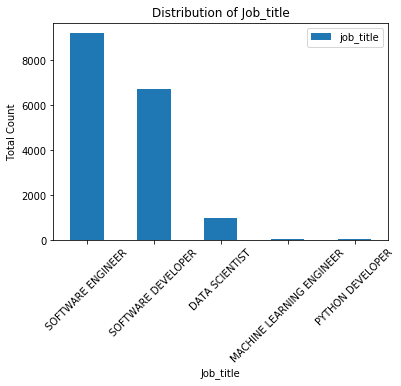

In [65]:
job_title.plot.bar(legend=True)
plt.title('Distribution of Job_title')
plt.xlabel('Job_title')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.show()

# Distribution by Location

In [68]:
locations = h1b_data.location.value_counts().head()

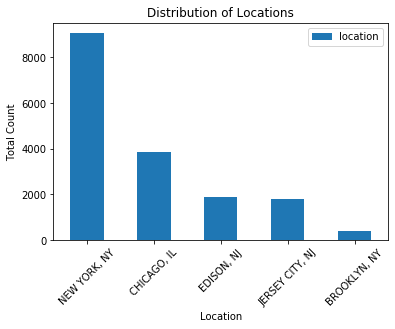

In [69]:
locations.plot.bar(legend=True)
plt.title('Distribution of Locations')
plt.xlabel('Location')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.show()